In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [35]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['3880.webp', '8808.webp', '131.webp', '8749.webp', '4243.webp']



In [36]:
Sardin_pic= os.listdir('sardin')

In [37]:
Chandana_pic= os.listdir('chandana')

In [38]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 10000
Sardin images: 10000
Chandana images: 10000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [39]:
# create the labels

Ilish_labels = [0]*10000

Sardin_labels = [1]*10000

Chandana_labels = [2]*10000

In [40]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [41]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

10000
10000
10000


In [42]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

30000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [43]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 10000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [44]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 10000, 1: 10000, 2: 10000}


array([[[159, 156, 151],
        [164, 161, 156],
        [153, 151, 146],
        ...,
        [158, 162, 161],
        [155, 157, 154],
        [140, 142, 139]],

       [[161, 158, 153],
        [150, 147, 142],
        [153, 150, 145],
        ...,
        [163, 167, 166],
        [166, 168, 165],
        [164, 165, 162]],

       [[150, 147, 140],
        [153, 151, 146],
        [150, 149, 144],
        ...,
        [167, 169, 168],
        [153, 155, 151],
        [152, 152, 148]],

       ...,

       [[183, 185, 182],
        [188, 190, 187],
        [194, 194, 192],
        ...,
        [114, 113, 108],
        [116, 116, 110],
        [109, 108, 104]],

       [[180, 182, 179],
        [181, 182, 179],
        [185, 185, 183],
        ...,
        [125, 127, 122],
        [110, 111, 106],
        [121, 121, 116]],

       [[174, 176, 173],
        [178, 180, 177],
        [177, 177, 175],
        ...,
        [117, 119, 116],
        [125, 125, 123],
        [126, 124, 120]]], dtype=uint8)
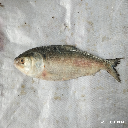

In [45]:
data[50]

In [46]:
type(data)

list

In [47]:
len(data)

30000

array([[[182, 184, 171],
        [183, 185, 174],
        [187, 188, 180],
        ...,
        [178, 178, 169],
        [175, 175, 167],
        [175, 177, 166]],

       [[171, 174, 167],
        [183, 186, 179],
        [193, 196, 189],
        ...,
        [169, 170, 162],
        [176, 177, 169],
        [180, 182, 173]],

       [[192, 194, 188],
        [191, 197, 190],
        [208, 213, 207],
        ...,
        [173, 174, 166],
        [177, 178, 169],
        [161, 163, 152]],

       ...,

       [[152, 152, 144],
        [149, 150, 142],
        [157, 158, 152],
        ...,
        [139, 140, 133],
        [136, 137, 131],
        [140, 141, 136]],

       [[162, 164, 159],
        [156, 157, 151],
        [158, 159, 153],
        ...,
        [138, 138, 130],
        [144, 145, 137],
        [144, 144, 137]],

       [[156, 157, 152],
        [156, 157, 151],
        [156, 159, 152],
        ...,
        [138, 141, 131],
        [141, 144, 134],
        [136, 138, 130]]], dtype=uint8)
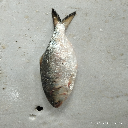

In [48]:
data[0]

In [49]:
type(data[0])

numpy.ndarray

In [50]:
data[0].shape

(128, 128, 3)

In [51]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [52]:
type(X)

numpy.ndarray

In [53]:
type(Y)

numpy.ndarray

In [54]:
print(X.shape)
print(Y.shape)

(30000, 128, 128, 3)
(30000,)


In [55]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(30000, 128, 128, 3) (24000, 128, 128, 3) (6000, 128, 128, 3)


In [58]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[215, 216, 221],
        [215, 216, 221],
        [215, 216, 222],
        ...,
        [205, 208, 212],
        [203, 205, 210],
        [203, 204, 209]],

       [[214, 215, 221],
        [214, 215, 220],
        [215, 216, 221],
        ...,
        [204, 205, 210],
        [200, 201, 206],
        [198, 199, 204]],

       [[215, 215, 221],
        [214, 215, 221],
        [215, 216, 221],
        ...,
        [203, 204, 209],
        [202, 203, 208],
        [199, 202, 207]],

       ...,

       [[186, 187, 192],
        [185, 186, 191],
        [185, 186, 191],
        ...,
        [179, 181, 187],
        [181, 183, 189],
        [180, 182, 189]],

       [[186, 187, 193],
        [186, 187, 192],
        [186, 187, 192],
        ...,
        [179, 181, 187],
        [180, 181, 187],
        [179, 180, 187]],

       [[188, 189, 194],
        [188, 189, 194],
        [187, 188, 193],
        ...,
        [178, 180, 185],
        [178, 180, 185],
        [177, 178, 185]]], dtype=uint8)
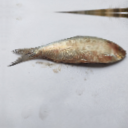

In [59]:
X_train[0]

#CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

# Function to display grid view of first image outputs
def display_grid(images, rows, cols, title="Grid View of Conv Layer Outputs"):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='viridis')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Build a CNN model
input_shape = (224, 224, 3)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(np.unique(Y_train)), activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=1,  # Update epoch count as needed
                        batch_size=32,
                        verbose=1)

    # Visualize the first image after each conv layer
    first_image = X_train_scaled[0]
    intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers if 'conv' in layer.name])
    intermediate_outputs = intermediate_model.predict(np.expand_dims(first_image, axis=0))

    images = [output[0, :, :, 0] for output in intermediate_outputs if len(output.shape) == 4]
    display_grid(images, rows=2, cols=2, title=f"Conv Layer Outputs for Fold {fold + 1}")

    # Evaluate the model on validation data
    val_predictions = model.predict(X_val_fold)
    val_predictions_classes = np.argmax(val_predictions, axis=1)

    # Confusion matrix
    cm = confusion_matrix(Y_val_fold, val_predictions_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score and Accuracy
    f1 = f1_score(Y_val_fold, val_predictions_classes, average='weighted')
    accuracy = accuracy_score(Y_val_fold, val_predictions_classes)
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Store results
    kfold_results.append({
        'fold': fold + 1,
        'f1_score': f1,
        'accuracy': accuracy,
        'confusion_matrix': cm
    })


In [ ]:

# Aggregate K-Fold Results
f1_scores = [result['f1_score'] for result in kfold_results]
accuracies = [result['accuracy'] for result in kfold_results]
confusion_matrices = [result['confusion_matrix'] for result in kfold_results]

print("\nK-Fold Cross Validation Results:")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


In [ ]:

# Visualize average confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# Plot F1 Score and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', label='F1 Score')
plt.title("F1 Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', label='Accuracy')
plt.title("Accuracies per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


#Resnet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

# Function to display the first image
def display_image(image, title="Image at Conv Layer"):
    plt.imshow(image.astype("uint8"))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Adding a custom head for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False


In [ ]:

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=1,  # Update epoch count as needed
                        batch_size=32,
                        verbose=1)

    # Visualize the first image after each conv layer
    first_image = X_train_scaled[0]
    intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in base_model.layers if 'conv' in layer.name])
    intermediate_outputs = intermediate_model.predict(np.expand_dims(first_image, axis=0))
    
    for i, output in enumerate(intermediate_outputs):
        if len(output.shape) == 4:  # Ensure it's an image-like output
            display_image(output[0, :, :, 0], title=f"Output after Conv Layer {i + 1}")


    # Evaluate the model on validation data
    val_predictions = model.predict(X_val_fold)
    val_predictions_classes = np.argmax(val_predictions, axis=1)


    # Confusion matrix
    cm = confusion_matrix(Y_val_fold, val_predictions_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:

# F1 Score and Accuracy
f1 = f1_score(Y_val_fold, val_predictions_classes, average='weighted')
accuracy = accuracy_score(Y_val_fold, val_predictions_classes)
print(f"Fold {fold + 1} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Store results
kfold_results.append({
    'fold': fold + 1,
    'f1_score': f1,
    'accuracy': accuracy,
    'confusion_matrix': cm
})


In [ ]:

# Aggregate K-Fold Results
f1_scores = [result['f1_score'] for result in kfold_results]
accuracies = [result['accuracy'] for result in kfold_results]

print("\nK-Fold Cross Validation Results:")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

In [ ]:

# Plot F1 Score and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', label='F1 Score')
plt.title("F1 Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', label='Accuracy')
plt.title("Accuracies per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()



#K-Fold with Adam Optimizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

# Function to display grid view of first image outputs
def display_grid(images, rows, cols, title="Grid View of Conv Layer Outputs"):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='viridis')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Initialize the ResNet model with added CNN layers
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# CNN layers before ResNet
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# ResNet base model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=x)

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False


In [ ]:

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=1,  # Update epoch count as needed
                        batch_size=32,
                        verbose=1)

    # Visualize the first image after each conv layer
    first_image = X_train_scaled[0]
    intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers if 'conv' in layer.name])
    intermediate_outputs = intermediate_model.predict(np.expand_dims(first_image, axis=0))

    images = [output[0, :, :, 0] for output in intermediate_outputs if len(output.shape) == 4]
    display_grid(images, rows=2, cols=2, title=f"Conv Layer Outputs for Fold {fold + 1}")


    # Evaluate the model on validation data
    val_predictions = model.predict(X_val_fold)
    val_predictions_classes = np.argmax(val_predictions, axis=1)


    # Confusion matrix
    cm = confusion_matrix(Y_val_fold, val_predictions_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:

# F1 Score and Accuracy
f1 = f1_score(Y_val_fold, val_predictions_classes, average='weighted')
accuracy = accuracy_score(Y_val_fold, val_predictions_classes)
print(f"Fold {fold + 1} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Store results
kfold_results.append({
    'fold': fold + 1,
    'f1_score': f1,
    'accuracy': accuracy,
    'confusion_matrix': cm
})


In [ ]:

# Aggregate K-Fold Results
f1_scores = [result['f1_score'] for result in kfold_results]
accuracies = [result['accuracy'] for result in kfold_results]
confusion_matrices = [result['confusion_matrix'] for result in kfold_results]

print("\nK-Fold Cross Validation Results:")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


In [ ]:

# Visualize average confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# Plot F1 Score and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', label='F1 Score')
plt.title("F1 Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', label='Accuracy')
plt.title("Accuracies per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

#EfficientNetB0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

# Function to display grid view of first image outputs
def display_grid(images, rows, cols, title="Grid View of Conv Layer Outputs"):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='viridis')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Initialize the EfficientNet model with added CNN layers
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# CNN layers before EfficientNet
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# EfficientNet base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=x)

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False


In [ ]:

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=1,  # Update epoch count as needed
                        batch_size=32,
                        verbose=1)

    # Visualize the first image after each conv layer
    first_image = X_train_scaled[0]
    intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers if 'conv' in layer.name])
    intermediate_outputs = intermediate_model.predict(np.expand_dims(first_image, axis=0))

    images = [output[0, :, :, 0] for output in intermediate_outputs if len(output.shape) == 4]
    display_grid(images, rows=2, cols=2, title=f"Conv Layer Outputs for Fold {fold + 1}")

    # Evaluate the model on validation data
    val_predictions = model.predict(X_val_fold)
    val_predictions_classes = np.argmax(val_predictions, axis=1)

    # Confusion matrix
    cm = confusion_matrix(Y_val_fold, val_predictions_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score and Accuracy
    f1 = f1_score(Y_val_fold, val_predictions_classes, average='weighted')
    accuracy = accuracy_score(Y_val_fold, val_predictions_classes)
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Store results
    kfold_results.append({
        'fold': fold + 1,
        'f1_score': f1,
        'accuracy': accuracy,
        'confusion_matrix': cm
    })


In [ ]:

# Aggregate K-Fold Results
f1_scores = [result['f1_score'] for result in kfold_results]
accuracies = [result['accuracy'] for result in kfold_results]
confusion_matrices = [result['confusion_matrix'] for result in kfold_results]

print("\nK-Fold Cross Validation Results:")
print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


In [ ]:

# Visualize average confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

# Plot F1 Score and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', label='F1 Score')
plt.title("F1 Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', label='Accuracy')
plt.title("Accuracies per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


#End